In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np

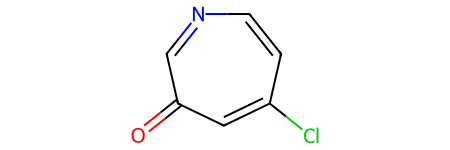

In [2]:
Chem.MolFromSmiles('Clc1ccncc(=O)c1')

In [3]:
frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
mol = Chem.MolFromMolFile('mol.txt')

[11:19:14] Running LargestFragmentChooser
[11:19:14] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[11:19:14] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


[11:19:15] Running LargestFragmentChooser
[11:19:15] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[11:19:15] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]"
1,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]"
2,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]"
3,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]"
4,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]"

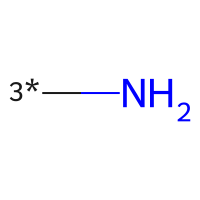
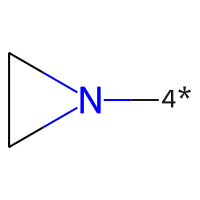
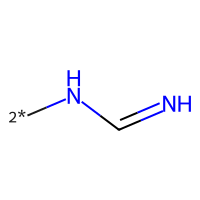
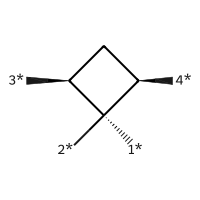
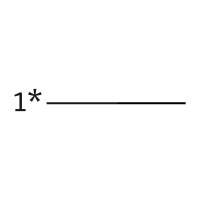

In [4]:
ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')

In [5]:
unique_frame = ff.count_uniques(frag_frame)

In [6]:
ff.output_ifc_gjf(mol,  unique_frame)